In [1]:
import time
import bisect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

“Please note that  the submission is an ipython notebook with explanations in markdown. Please save images of the graphs you output and include in your submission a zipped folder with the jupyter notebook and images. This is because the graphs output by the notebook will differ depending on the machine, OS etc, and we may not see the same image you do when we run the notebook to grade. You only need to add "plt.savefig('file_nameXX.png')" at the end of the cell where you plot.”

In [2]:
test_list_i = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,101,102,103,104,105,106,107,108,109,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,201,202,203,204,205,206,207,208,209,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280,285,290,295,300,301,302,303,304,305,306,307,308,309,310,315,320,325,330,335,340,345,350,355,360,365,370,375,380,385,390,395,400,401,402,403,404,405,406,407,408,409,410,415,420,425,430,435,440,445,450,455,460,465,470,475,480,485,490,495,500,501,502,503,504,505,506,507,508,509,510,515,520,525,530,535,540,545,550,555,560,565,570,575,580,585,590,595,600,601,602,603,604,605,606,607,608,609,610,615,620,625,630,635,640,645,650,655,660,665,670,675,680,685,690,695,700,701,702,703,704,705,706,707,708,709,710,715,720,725,730,735,740,745,750,755,760,765,770,775,780,785,790,795,800,801,802,803,804,805,806,807,808,809,810,815,820,825,830,835,840,845,850,855,860,865,870,875,880,885,890,900,901,902,903,904,905,906,907,908,909,910,915,920,925,930,935,940,945,950,955,960,965,970,975,980,985,990,995,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600]
test_list_r = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,101,102,103,104,105,106,107,108,109,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,201,202,203,204,205,206,207,208,209,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280,285,290,295,300,301,302,303,304,305,306,307,308,309,310,315,320,325,330,335,340,345,350,355,360,365,370,375,380,385,390,395,400,401,402,403,404,405,406,407,408,409,410,415,420,425,430,435,440,445,450,455,460,465,470,475,480,485,490,495,500,501,502,503,504,505,506,507,508,509,510,515,520,525,530,535,540,545,550,555,560,565,570,575,580,585,590,595,600,601,602,603,604,605,606,607,608,609,610,615,620,625,630,635,640,645,650,655,660,665,670,675,680,685,690,695,700,701,702,703,704,705,706,707,708,709,710,715,720,725,730,735,740,745,750,755,760,765,770,775,780,785,790,795,800,801,802,803,804,805,806,807,808,809,810,815,820,825,830,835,840,845,850,855,860,865,870,875,880,885,890,900,901,902,903,904,905,906,907,908,909,910,915,920,925,930,935,940,945,950,955,960,965,970,975,980,985,990,995,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600]

## Iterative Factorial Function


In [3]:
def fact_i(x):
    tic = time.perf_counter_ns()
    i = 1
    fact = 1
    while i <= x:
        fact *= i
        i += 1
    toc = time.perf_counter_ns()
    seconds = toc - tic
    
    return [fact, seconds]

In [4]:
j = 0
timeTakenLists_i = []
while j < 50:
    factResults_i = []
    timeTaken_i = []
    for i in test_list_i:
        temp = fact_i(i)
        factResults_i.append(temp[0])
        timeTaken_i.append(round(temp[1],4))
    timeTakenLists_i.append(timeTaken_i)
    j += 1

In [5]:
timePerFact_i = []
for l in range(len(timeTakenLists_i[0])):
    timePerFact_i.append([])
    for k in range(len(timeTakenLists_i)):
        timePerFact_i[l].append(timeTakenLists_i[k][l])

In [6]:
timeAverages_i = []
for m in range(len(timePerFact_i)):
    timeSum_i = sum(timePerFact_i[m])
    timeAverages_i.append(timeSum_i / len(timePerFact_i[0]))

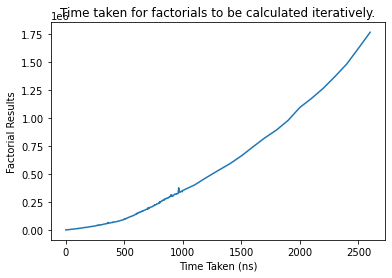

In [7]:
plt.plot(test_list_i,timeAverages_i)
plt.xlabel('Time Taken (ns)')
plt.ylabel('Factorial Results')
plt.title('Time taken for factorials to be calculated iteratively.')
plt.show()

### Discussion of iterative function results

## Recursive Factorial Function


In [8]:
def fact_r(n):
    """Function to return the factorial of a number using recursion"""
    tic = time.perf_counter_ns()
    if n == 0:
        factorials = 1
    else:
        factorials = n * fact_r(n-1)
    toc = time.perf_counter_ns()
    timeTaken = toc - tic
    
    return [factorials, timeTaken]

In [9]:
x = 0
timeTakenLists_r = []
while x < 10:
    factResults_r = []
    timeTaken_r = []
    for i in test_list_r:
        temp = fact_r(i)
        factResults_r.append(temp[0])
        timeTaken_r.append(temp[1])
    timeTakenLists_r.append(timeTaken_r)
    x += 1

In [10]:
timePerFact_r = []
for l in range(len(timeTakenLists_r[0])):
    timePerFact_r.append([])
    for k in range(len(timeTakenLists_r)):
        timePerFact_r[l].append(timeTakenLists_r[k][l])

In [11]:
timeAverages_r = []
for m in range(len(timePerFact_r)):
    timeSum_r = sum(timePerFact_r[m])
    timeAverages_r.append(timeSum_r / len(timePerFact_r[0]))

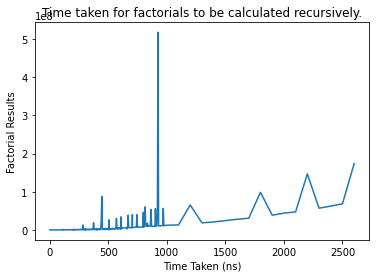

In [12]:
plt.plot(test_list_r, timeTaken_r)
plt.xlabel('Time Taken (ns)')
plt.ylabel('Factorial Results')
plt.title('Time taken for factorials to be calculated recursively.')
plt.show()

### Discussion for recursive factorial results

## Linear Search


Compare pythons inbuilt index feature with my linear search function

Using the answers sequence from the iterative and recursive functions in order to keep a consistent sequence. Due to fluxuations in times due to the work the CPU is completing at the same time, the time sequences may not be exact.

In [13]:
bestCase = factResults_i[0]
worstCase = factResults_i[-1]
missingCase = -1

### Python's .index() method


In [14]:
timeTakenBCIn = []
i = 0
while i < 100:
    tic = time.perf_counter_ns()
    bestCaseIndex = factResults_i.index(bestCase)
    toc = time.perf_counter_ns()
    timeTakenBCIn.append(toc - tic)
    i += 1

In [15]:
timeTakenBCInAvg = sum(timeTakenBCIn) / len(timeTakenBCIn)

In [16]:
timeTakenWCIn = []
i = 0
while i < 100:
    tic = time.perf_counter_ns()
    worstCaseIndex = factResults_i.index(worstCase)
    toc = time.perf_counter_ns()
    timeTakenWCIn.append(toc - tic)
    i += 1

In [17]:
timeTakenWCInAvg = sum(timeTakenWCIn) / len(timeTakenWCIn)

In [18]:
timeTakenMCIn = []
i = 0
while i < 100:
    tic = time.perf_counter_ns()
    try:
        Index = factResults_i.index(missingCase)
    except:
        error = "error"
    toc = time.perf_counter_ns()
    timeTakenMCIn.append(toc - tic)
    i += 1

In [19]:
timeTakenMCInAvg = sum(timeTakenMCIn) / len(timeTakenMCIn)

In [20]:
timeTakenListIn = [timeTakenBCInAvg, timeTakenMCInAvg, timeTakenWCInAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

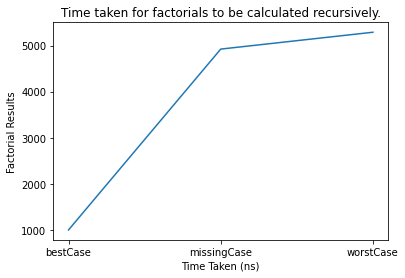

In [21]:
plt.plot(casesListIn, timeTakenListIn)
plt.xlabel('Time Taken (ns)')
plt.ylabel('Factorial Results')
plt.title('Time taken for factorials to be calculated recursively.')
plt.show()

### Linear Search Function

In [22]:
def linearSearch(array, x):
    error = 0
    try:
        for i in range(len(array)):
            if (array[i] == x):
                return i
    except:
        error = "error"
        return error

In [23]:
timeTakenListBL = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    bestLinear = linearSearch(factResults_i, bestCase)
    toc = time.perf_counter_ns()
    timeTakenListBL.append(toc - tic)
    y += 1

In [24]:
timeTakenBLAvg = sum(timeTakenListBL) / len(timeTakenListBL)

In [25]:
timeTakenListWL = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    worstLinear = linearSearch(factResults_i, worstCase)
    toc = time.perf_counter_ns()
    timeTakenListWL.append(toc - tic)
    y += 1

In [26]:
timeTakenWLAvg = sum(timeTakenListWL) / len(timeTakenListWL)

In [27]:
timeTakenListML = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    missingLinear = linearSearch(factResults_i, missingCase)
    toc = time.perf_counter_ns()
    timeTakenListML.append(toc - tic)
    y += 1
print(timeTakenListML)

[101660, 28426, 18437, 17388, 17519, 17357, 17376, 17260, 25718, 16596]


In [28]:
timeTakenMLAvg = sum(timeTakenListML) / len(timeTakenListML)

In [29]:
timeTakenListLin = [timeTakenBLAvg, timeTakenMLAvg, timeTakenWLAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

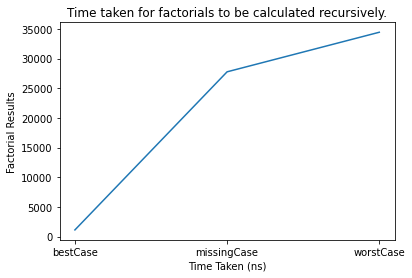

In [30]:
plt.plot(casesListIn, timeTakenListLin)
plt.xlabel('Time Taken (ns)')
plt.ylabel('Factorial Results')
plt.title('Time taken for factorials to be calculated recursively.')
plt.show()

## Binary Search using bisect() method


In [31]:
halfway = int((len(factResults_i)/2)-1)
print(halfway)
bestCase_b = factResults_i[halfway]
worstCase_b = factResults_i[-1]
missingCase_b = -1

146


In [32]:
def bisectSearch(array, value):
    try:
        i = bisect.bisect_left(array, value)
        if i < len(array) and array[i] == value:
            return i
    except:
        return "error"

In [33]:
timeTakenListBB = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    bestBinary = bisectSearch(factResults_i, bestCase_b)
    toc = time.perf_counter_ns()
    timeTakenListBB.append(toc - tic)
    y += 1
print(bestBinary)

146


In [34]:
timeTakenBBAvg = sum(timeTakenListBB) / len(timeTakenListBB)

In [35]:
timeTakenListWB = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    worstBinary = bisectSearch(factResults_i, worstCase_b)
    toc = time.perf_counter_ns()
    timeTakenListWB.append(toc - tic)
    y += 1

In [36]:
timeTakenWBAvg = sum(timeTakenListWB) / len(timeTakenListWB)

In [37]:
timeTakenListMB = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    missingBinary = bisectSearch(factResults_i, missingCase_b)
    toc = time.perf_counter_ns()
    timeTakenListMB.append(toc - tic)
    y += 1

In [38]:
timeTakenMBAvg = sum(timeTakenListMB) / len(timeTakenListMB)

In [39]:
timeTakenListBis = [timeTakenBBAvg, timeTakenMBAvg, timeTakenWBAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

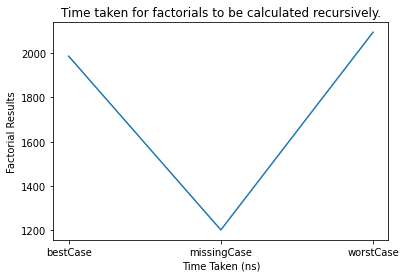

In [40]:
plt.plot(casesListIn, timeTakenListBis)
plt.xlabel('Time Taken (ns)')
plt.ylabel('Factorial Results')
plt.title('Time taken for factorials to be calculated recursively.')
plt.show()

## Binary Search Iteratively

In [41]:
def binarySearchIterative(array, value):
    try:
        beginning = 0
        end = (len(array)-1)
        center = int((len(array)/2)-1)

        if array[center] == value:
                return center
            
        while beginning <= end:
            center = (beginning + end) // 2
            
            if array[center] == value:
                return center
            
            if array[center] < value:
                beginning = center + 1
            elif array[center] > value:
                end = center - 1
    except:
        return "error"
        

In [42]:
timeTakenListBBI = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    bestBinary = binarySearchIterative(factResults_i, bestCase_b)
    toc = time.perf_counter_ns()
    timeTakenListBBI.append(toc - tic)
    y += 1
print(bestBinary)

146


In [43]:
timeTakenBBIAvg = sum(timeTakenListBBI) / len(timeTakenListBBI)

In [44]:
timeTakenListWBI = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    worstBinary = binarySearchIterative(factResults_i, worstCase_b)
    toc = time.perf_counter_ns()
    timeTakenListWBI.append(toc - tic)
    y += 1

In [45]:
timeTakenWBIAvg = sum(timeTakenListWBI) / len(timeTakenListWBI)

In [46]:
timeTakenListMBI = []
y = 0
while y < 10:
    tic = time.perf_counter_ns()
    missingBinary = binarySearchIterative(factResults_i, missingCase_b)
    toc = time.perf_counter_ns()
    timeTakenListMBI.append(toc - tic)
    y += 1

In [47]:
timeTakenMBIAvg = sum(timeTakenListMBI) / len(timeTakenListMBI)

In [48]:
timeTakenListBin = [timeTakenBBIAvg, timeTakenMBIAvg, timeTakenWBIAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

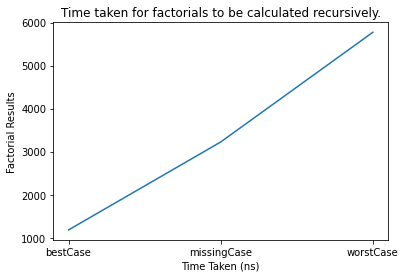

In [49]:
plt.plot(casesListIn, timeTakenListBin)
plt.xlabel('Time Taken (ns)')
plt.ylabel('Factorial Results')
plt.title('Time taken for factorials to be calculated recursively.')
plt.show()

## Binary Search Recursive Function

In [50]:
list1 = [1,2,3]
list2 = [1,2,3]
array = [[1,2,3], [1,2,3]]

newarray = []
for l in range(len(array[0])):
    newarray.append([])
    for k in range(len(array)):
        
        newarray[l].append(array[k][l])
print(newarray)


[[1, 1], [2, 2], [3, 3]]


In [51]:
print(newarray)

[[1, 1], [2, 2], [3, 3]]
